## Implemented ACM validation

In [126]:
class convergence_plotter_single2():
    def __init__(self,walkers,num_run,data_dir,ID):
        self.num_walkers = walkers
        self.num_run = num_run
        self.data_dir = data_dir
        self.files = []
        self.ID = ID
        
    def opener(self, pr = False):
        f = [x for x in glob.glob(f'{self.data_dir}/*.{self.ID}.mcmc.hdf5')]  
        f.sort()
        if pr:
            print(f)
        files = []
        
        for i in f:
            file = h5py.File(i,'r')
            files.append(file)
        
        self.files = files
        return bool(len(f))
    
    def avg_perc_plot(self,ax, gal_idx, spec_photo,step=1000, flag = ''):
        data = self.files[0]['mcmc_chain'][...][:,0]
        perc_err = []
        
        y,up_perc,lo_perc = [], [], []
        length = len(data)
        inc = length//step
        x_axis = (np.arange(inc)+1)*step
        for n in range(inc):
            up = np.percentile(data[:step*(1+n)],84.1)
            lo = np.percentile(data[:step*(1+n)],15.9)
            med = np.median(data[:step*(1+n)])
            up_perc.append(up-med)
            lo_perc.append(med-lo)
            y.append(med)

        yerr = np.vstack((up_perc,lo_perc))    
        ax.set_xlabel('$N_{iteration}$')
        ax.set_ylabel('Median')
        ax.grid()
        ax.axhline(input_mass[gal_idx], lw = 1, c = 'r')
        ax.text(length,y[-1],f'{y[-1]}')
        ax.errorbar(x_axis,y,yerr=yerr,fmt = '.k', ecolor = 'gray', elinewidth=1,capsize=1)
    
    def get_output(self):
        data = self.files[0]['mcmc_chain'][...][:,0]
        med = np.median(data)
        return med 
    def get_err(self):
        data = self.files[0]['mcmc_chain'][...][:,0]
        med = np.median(data)
        up = np.percentile(data,84.1) - med
        lo = med - np.percentile(data, 15.9)
        return up, lo
    
    def get_length(self):
        data = self.files[0]['mcmc_chain'][...][:,0]
        return len(data)

In [127]:
path = os.environ.get('GQPMC_DIR') + 'mini_mocha/ispeculator/ACM/run_03/'

In [201]:
compare = []
compare_up = []
compare_lo = []
comp_length = []
comp_length_dic = {}
for i in range(96):
    file = convergence_plotter_single2(40,100000,os.environ.get('GQPMC_DIR')+'mini_mocha/ispeculator/iSpeculator_validation/specphoto_0_96/',i)
    if file.opener():
        compare.append(file.get_output())
        up, lo = file.get_err()
        compare_up.append(up)
        compare_lo.append(lo)
        comp_length.append(file.get_length())
        comp_length_dic[i] = file.get_length()
    else:
        compare.append(-1)
        compare_up.append(0)
        compare_lo.append(0)
        comp_length.append(-1e8)

In [202]:
valid_set = []
for i in range(96):
    file = convergence_plotter_single2(40,1000000,path,i)
    if file.opener(pr = False):
        valid_set.append(file)
    else:
        print(i)
        valid_set.append('N/A')

19
33
64
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95


In [203]:
print(len(valid_set))
print(valid_set)

96
[<__main__.convergence_plotter_single2 object at 0x1ab5c9e050>, <__main__.convergence_plotter_single2 object at 0x1ab593ed10>, <__main__.convergence_plotter_single2 object at 0x1ab6cfa750>, <__main__.convergence_plotter_single2 object at 0x1ab7b25b50>, <__main__.convergence_plotter_single2 object at 0x1ab5ca3790>, <__main__.convergence_plotter_single2 object at 0x1ab5c9e750>, <__main__.convergence_plotter_single2 object at 0x1ab717fcd0>, <__main__.convergence_plotter_single2 object at 0x1ab5c9ee90>, <__main__.convergence_plotter_single2 object at 0x1ab5c9e0d0>, <__main__.convergence_plotter_single2 object at 0x1ab5ca3190>, <__main__.convergence_plotter_single2 object at 0x1ab4f57bd0>, <__main__.convergence_plotter_single2 object at 0x1ab6f35890>, <__main__.convergence_plotter_single2 object at 0x1ab6f35810>, <__main__.convergence_plotter_single2 object at 0x1ab6f35d90>, <__main__.convergence_plotter_single2 object at 0x1ab6f35610>, <__main__.convergence_plotter_single2 object at 0x1

In [204]:
meds = []
ups = []
los = []
ACF_length = []
ACF_length_dic = {}
for i,s in enumerate(valid_set):
    if s != 'N/A':
#         fig, ax = plt.subplots(1,1)
#         s.avg_perc_plot(ax,i,'specphoto',10000)
        meds.append(s.get_output())
        up, lo = s.get_err()
        ups.append(up)
        los.append(lo)
        ACF_length.append(s.get_length())
        ACF_length_dic[i]=s.get_length()
    else:
        print(i)
        meds.append(-1)
        up,lo = (0,0)
        ups.append(up)
        los.append(lo)
        ACF_length.append(-1e8)

19
33
64
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95


In [205]:
from matplotlib import cm
from matplotlib import colors

In [206]:
inferno = cm.inferno

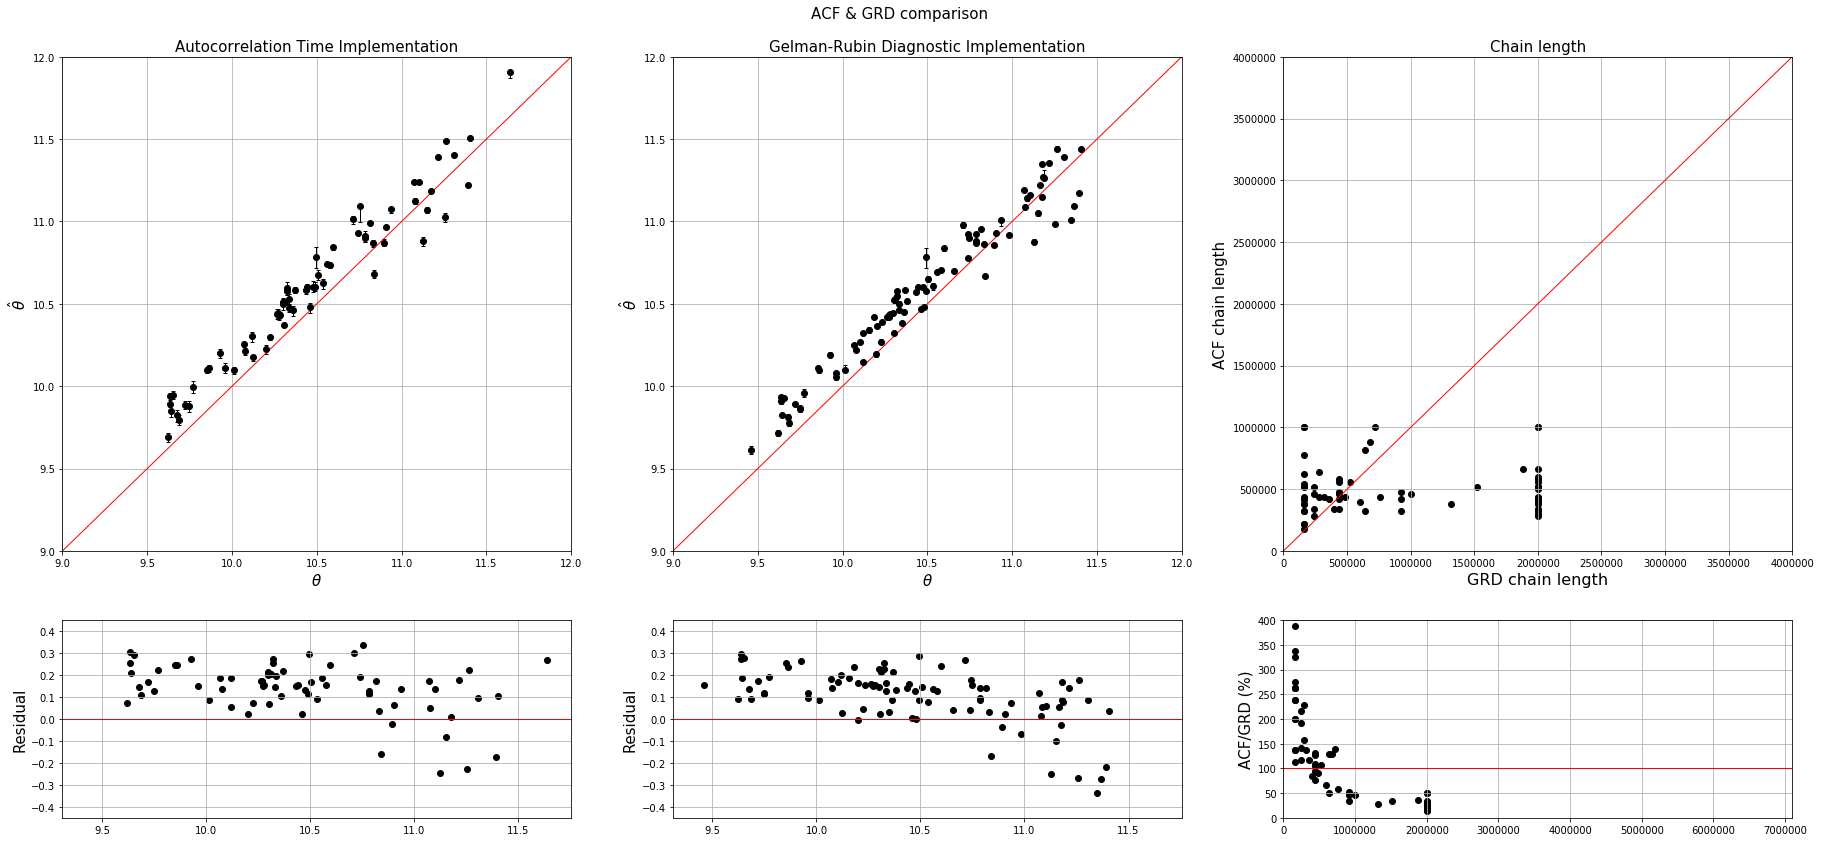

In [207]:
fig, axs = plt.subplots(2,3,figsize=(31,14), gridspec_kw={'height_ratios' : (10,4)})
xlim = axs[0,0].set_xlim(9,12)
axs[0,0].set_ylim(xlim)
axs[0,1].set_xlim(xlim)
axs[0,1].set_ylim(xlim)
axs[0,2].set_xlim(0,4000000)
axs[0,2].set_ylim(0,4000000)
axs[1,2].set_ylim(0,400)

for ax in axs:
    for x in ax:
        x.grid()

        
a = np.array(ACF_length)*100/np.array(comp_length[:len(ACF_length)])
norm = colors.Normalize(vmin=a.min(), vmax=a.max())
c = inferno(norm(a))

axs[0,0].errorbar(input_mass[:len(meds)],meds,yerr=(ups,los), elinewidth = 1, fmt = 'ok', capsize = 2)
axs[0,1].errorbar(input_mass[:len(meds)],compare[:len(meds)],yerr=(compare_up[:len(meds)], compare_lo[:len(meds)]), fmt = 'ok',elinewidth = 1, capsize = 2)
axs[0,2].scatter(comp_length[:len(ACF_length)],ACF_length, c = 'k')

axs[1,0].set_ylim(-0.45,0.45)
axs[1,1].set_ylim(-0.45,0.45)

axs[1,0].scatter(input_mass[:len(meds)],np.array(meds)-np.array(input_mass[:len(meds)]), c = 'k')
axs[1,1].scatter(input_mass[:len(meds)],np.array(compare[:len(meds)])-np.array(input_mass[:len(meds)]), c = 'k')
axs[1,2].scatter(comp_length[:len(ACF_length)],np.array(ACF_length)*100/np.array(comp_length[:len(ACF_length)]), c = 'k')

axs[0,0].set_title('Autocorrelation Time Implementation', fontsize = 15)
axs[0,1].set_title('Gelman-Rubin Diagnostic Implementation', fontsize = 15)
axs[0,2].set_title('Chain length', fontsize = 15)

axs[0,0].set_xlabel('$\\theta$', fontsize = 15)
axs[0,0].set_ylabel('$\hat{\\theta}$', fontsize = 15)

axs[0,1].set_xlabel('$\\theta$', fontsize = 15)
axs[0,1].set_ylabel('$\hat{\\theta}$', fontsize = 15)

axs[0,2].set_xlabel('GRD chain length', fontsize = 16)
axs[0,2].set_ylabel('ACF chain length', fontsize = 15)

axs[1,0].axhline(0,c = 'r', lw = 1)
axs[1,1].axhline(0,c = 'r', lw = 1)
axs[1,2].axhline(100,c = 'r', lw = 1)

axs[1,0].axhline(np.mean(np.array(meds)-np.array(input_mass[:len(meds)])), c = 'b', lw = 1)
axs[1,1].axhline(np.mean(np.array(compare[:len(meds)])-np.array(input_mass[:len(meds)])), c = 'b', lw = 1)

axs[0,0].plot([9,12],[9,12], c = 'r', lw = 1)
axs[0,1].plot([9,12],[9,12], c = 'r', lw = 1)
axs[0,2].plot([0,4e8],[0,4e8], c = 'r', lw = 1)

axs[1,2].set_ylabel('ACF/GRD (%)', fontsize = 15)
axs[1,1].set_ylabel('Residual', fontsize = 15)
axs[1,0].set_ylabel('Residual', fontsize = 15)

axs[1,2].set_xlim(0,None)

fig.suptitle('ACF & GRD comparison',  y= 0.93, fontsize = 15)
plt.show()

In [208]:
al = np.array(ACF_length)
cl = np.array(comp_length)

In [209]:
al[al>0]

array([ 520000.,  320000.,  180000.,  340000.,  420000.,  420000.,
        880000.,  320000.,  420000.,  480000.,  420000.,  440000.,
        380000.,  440000.,  660000.,  460000.,  640000.,  300000.,
        520000.,  460000.,  520000.,  520000., 1000000.,  660000.,
        580000.,  420000.,  500000.,  780000.,  440000.,  320000.,
        420000.,  440000.,  280000.,  340000.,  420000.,  340000.,
        460000.,  440000., 1000000., 1000000.,  700000., 1000000.,
        520000.,  620000.,  320000.,  320000.,  440000.,  420000.,
        380000.,  420000.,  220000.,  380000.,  340000.,  400000.,
        600000.,  460000.,  560000.,  220000.,  520000.,  400000.,
        820000.,  520000.,  480000.,  560000.,  540000.,  560000.,
        380000.,  580000., 1000000.,  280000.])

In [199]:
cl[cl>0]

array([2000000.,  920000.,  160000., 2000000.,  920000., 2000000.,
        680000.,  640000., 2000000.,  440000.,  440000.,  320000.,
       2000000.,  280000., 1880000.,  240000.,  280000., 2000000.,
       2000000., 1000000.,  240000., 2000000.,  720000., 2000000.,
       2000000., 2000000., 2000000.,  160000.,  760000.,  160000.,
        160000., 2000000., 2000000.,  440000.,  360000.,  400000.,
        160000.,  160000., 2000000., 2000000., 2000000.,  160000.,
        160000., 2000000.,  480000.,  160000., 1320000.,  160000.,
        160000.,  160000.,  240000., 2000000., 2000000.,  440000.,
       2000000.,  160000., 1520000.,  600000.,  640000.,  160000.,
        920000.,  520000.,  160000.,  440000.,  160000.,  440000.,
        160000.,  240000., 2000000.,  160000.,  760000.,  160000.,
        520000., 2000000.,  440000., 2000000.,  600000., 2000000.,
        480000.,  960000.,  360000.,  680000.,  400000.,  160000.,
        520000.,  320000.,  160000.,  520000.,  640000.,  1600

In [215]:
len_ratio = []
for item in ACF_length_dic.items():
    igal, length = item
    if np.isin(igal,list(comp_length_dic.keys())):
        len_ratio.append(length/comp_length_dic[igal])
        

Text(0.5, 0, 'Length Ratio')

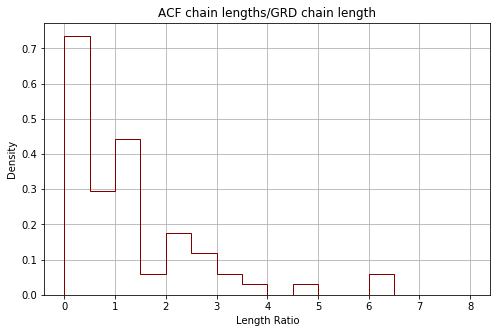

In [231]:
fig, ax = plt.subplots(1,1, figsize=(8,5))
ax.hist(len_ratio, bins = [0,0.5,1,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.0], histtype = 'step', color = 'maroon', density = True, lw = 1, zorder = 10)
ax.set_title('ACF chain lengths/GRD chain length')
ax.grid(zorder = 0)
ax.set_ylabel('Density')
ax.set_xlabel('Length Ratio')